### [ TALLER 04 ] : SPLINES CÚBICOS

Nombre: Alegria Isabel Farinango Farinango 

Fecha: 24/11/2025

---

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def cubic_spline_natural(x, y):
    x, y = np.array(x, float), np.array(y, float)
    n, h = len(x), np.diff(x)
    
    A = np.zeros((n, n))
    b = np.zeros(n)
    A[0, 0] = A[-1, -1] = 1.0
    
    for i in range(1, n - 1):
        A[i, i-1:i+2] = [h[i-1], 2*(h[i-1]+h[i]), h[i]]
        b[i] = 6*((y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1])
    
    M = np.linalg.solve(A, b)
    a = y[:-1].copy()
    b_c = (y[1:]-y[:-1])/h - h*(2*M[:-1]+M[1:])/6
    c_c = M[:-1]/2
    d_c = (M[1:]-M[:-1])/(6*h)
    
    return a, b_c, c_c, d_c

def cubic_spline_clamped(x, y, B0, Bn):
    x, y = np.array(x, float), np.array(y, float)
    n, h = len(x), np.diff(x)
    
    A = np.zeros((n, n))
    b = np.zeros(n)
    
    A[0, :2] = [2*h[0], h[0]]
    b[0] = 6*((y[1]-y[0])/h[0] - B0)
    
    for i in range(1, n - 1):
        A[i, i-1:i+2] = [h[i-1], 2*(h[i-1]+h[i]), h[i]]
        b[i] = 6*((y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1])
    
    A[-1, -2:] = [h[-1], 2*h[-1]]
    b[-1] = 6*(Bn - (y[-1]-y[-2])/h[-1])
    
    M = np.linalg.solve(A, b)
    a = y[:-1].copy()
    b_c = (y[1:]-y[:-1])/h - h*(2*M[:-1]+M[1:])/6
    c_c = M[:-1]/2
    d_c = (M[1:]-M[:-1])/(6*h)
    
    return a, b_c, c_c, d_c

def print_spline_equations(x, coeffs, titulo):
    a, b, c, d = coeffs
    print(f"\n{titulo}")
    for i in range(len(a)):
        print(f"[{x[i]}, {x[i+1]}]: S_{i}(x) = {a[i]:.4f} + {b[i]:.4f}(x-{x[i]}) + {c[i]:.4f}(x-{x[i]})² + {d[i]:.4f}(x-{x[i]})³")

def eval_spline(x_nodes, coeffs, x_eval):
    a, b, c, d = coeffs
    y_eval = np.zeros_like(x_eval, dtype=float)
    
    for i in range(len(a)):
        mask = (x_eval >= x_nodes[i]) & (x_eval <= x_nodes[i+1]) if i == len(a)-1 else (x_eval >= x_nodes[i]) & (x_eval < x_nodes[i+1])
        dx = x_eval[mask] - x_nodes[i]
        y_eval[mask] = a[i] + b[i]*dx + c[i]*dx**2 + d[i]*dx**3
    
    return y_eval

def plot_spline(x, y, coeffs_nat, coeffs_clamp, B1, titulo):
    xs = np.linspace(x[0], x[-1], 300)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, s=100, c='#E63946', label="Puntos", zorder=3, edgecolors='black')
    plt.plot(xs, eval_spline(x, coeffs_nat, xs), c='#1D3557', linewidth=2, label="Natural")
    plt.plot(xs, eval_spline(x, coeffs_clamp, xs), c='#F77F00', linewidth=2, label=f"Condicionada B₁={B1}")
    plt.title(titulo, fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

---

$ (0,1),(1,5),(2,3) $


EJERCICIO 1 - FRONTERA NATURAL
[0, 1]: S_0(x) = 1.0000 + 5.5000(x-0) + 0.0000(x-0)² + -1.5000(x-0)³
[1, 2]: S_1(x) = 5.0000 + 1.0000(x-1) + -4.5000(x-1)² + 1.5000(x-1)³

EJERCICIO 1 - CONDICIONADA (B₀=1, B₁=-2)
[0, 1]: S_0(x) = 1.0000 + 1.0000(x-0) + 8.2500(x-0)² + -5.2500(x-0)³
[1, 2]: S_1(x) = 5.0000 + 1.7500(x-1) + -7.5000(x-1)² + 3.7500(x-1)³


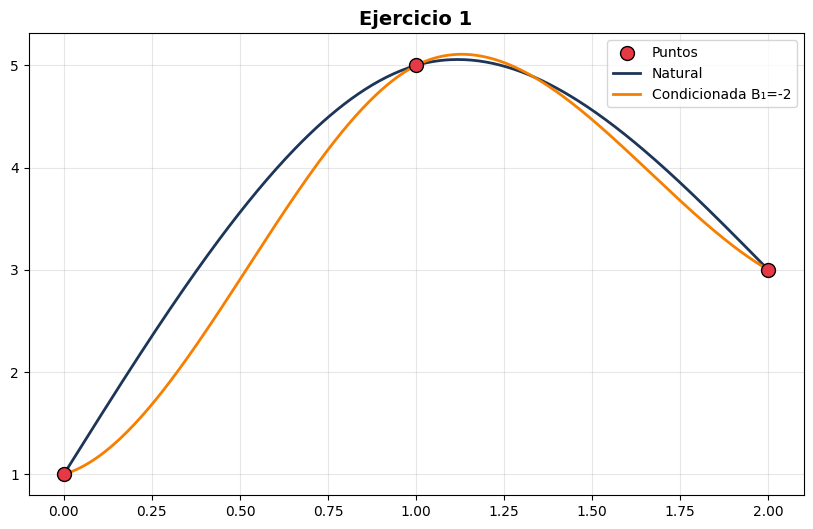


EJERCICIO 1 - CONDICIONADA (B₀=1, B₁=0)
[0, 1]: S_0(x) = 1.0000 + 1.0000(x-0) + 8.7500(x-0)² + -5.7500(x-0)³
[1, 2]: S_1(x) = 5.0000 + 1.2500(x-1) + -8.5000(x-1)² + 5.2500(x-1)³


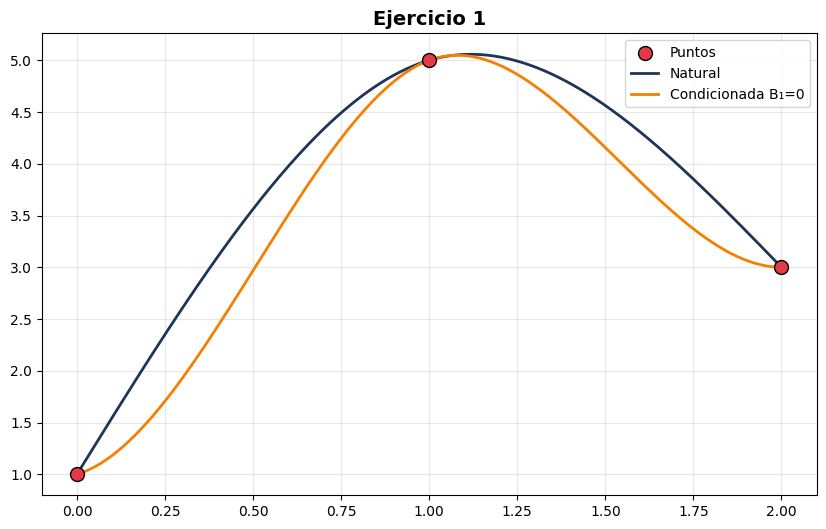


EJERCICIO 1 - CONDICIONADA (B₀=1, B₁=2)
[0, 1]: S_0(x) = 1.0000 + 1.0000(x-0) + 9.2500(x-0)² + -6.2500(x-0)³
[1, 2]: S_1(x) = 5.0000 + 0.7500(x-1) + -9.5000(x-1)² + 6.7500(x-1)³


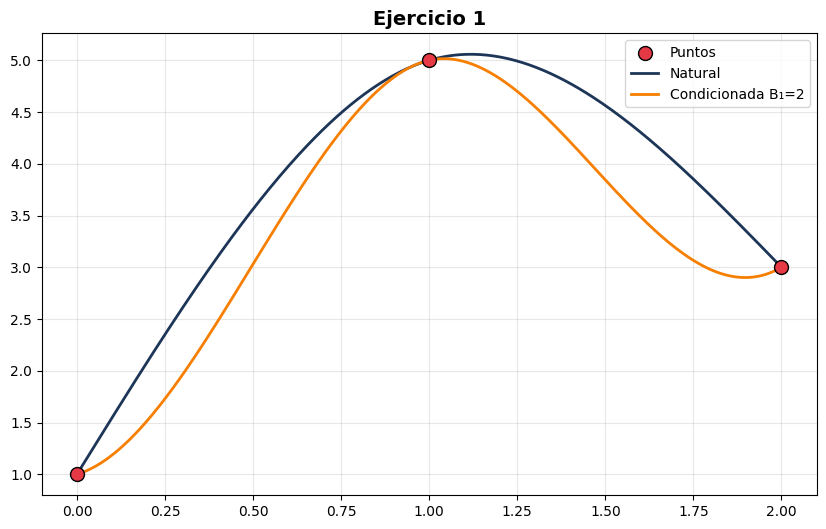


EJERCICIO 1 - CONDICIONADA (B₀=1, B₁=4)
[0, 1]: S_0(x) = 1.0000 + 1.0000(x-0) + 9.7500(x-0)² + -6.7500(x-0)³
[1, 2]: S_1(x) = 5.0000 + 0.2500(x-1) + -10.5000(x-1)² + 8.2500(x-1)³


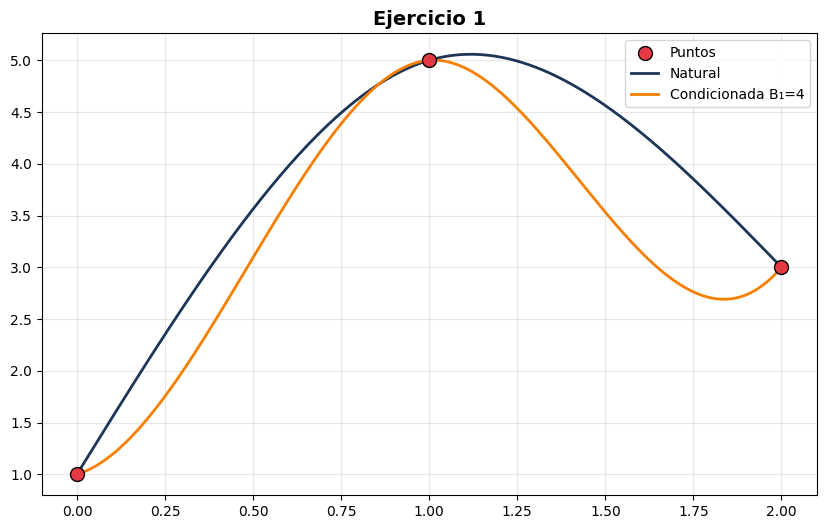


EJERCICIO 1 - CONDICIONADA (B₀=1, B₁=6)
[0, 1]: S_0(x) = 1.0000 + 1.0000(x-0) + 10.2500(x-0)² + -7.2500(x-0)³
[1, 2]: S_1(x) = 5.0000 + -0.2500(x-1) + -11.5000(x-1)² + 9.7500(x-1)³


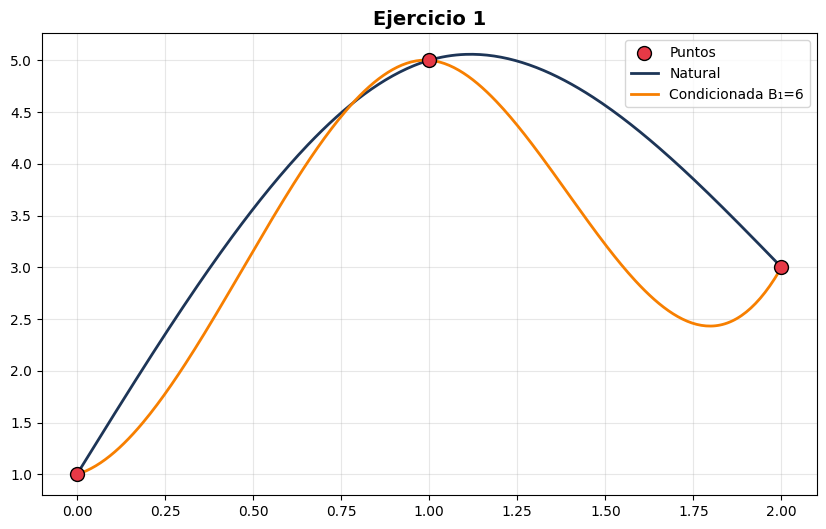

In [7]:
x1, y1 = np.array([0, 1, 2]), np.array([1, 5, 3])
coeffs1_nat = cubic_spline_natural(x1, y1)
print_spline_equations(x1, coeffs1_nat, "EJERCICIO 1 - FRONTERA NATURAL")

B0, B1_values = 1, [-2, 0, 2, 4, 6]
for B1 in B1_values:
    coeffs1_clamp = cubic_spline_clamped(x1, y1, B0, B1)
    print_spline_equations(x1, coeffs1_clamp, f"EJERCICIO 1 - CONDICIONADA (B₀={B0}, B₁={B1})")
    plot_spline(x1, y1, coeffs1_nat, coeffs1_clamp, B1, "Ejercicio 1")

---

$(0,−5),(1,−4),(2,3)$

---

$(0,−1),(1,1),(2,5),(3,2)$